# 삼성전자 주가 예측

In [1]:
%pip install plotly finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import FinanceDataReader as fdr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## 주요 변수 및 함수 선언

In [4]:
samsung_electronics = fdr.DataReader('005930', '2016')
values_at_closed = samsung_electronics[['Close']]

std_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(values_at_closed)

In [5]:
TEST_SIZE = 200
train_data = std_scaled[:-TEST_SIZE]
test_data = std_scaled[-TEST_SIZE:]

### 샘플 생성 함수 정의

In [6]:
def make_sample(data, window):
    '''
    Sampling data to specific size.

    Parameters
    ----------
    data : array_like
        origin data
    window : int
        size of each row

    Returns
    -------
    tuple[np.array]
        samplifed set for train, samplified set for target
    '''
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

In [7]:
X_train, y_train = make_sample(train_data, 30)
print(X_train.shape[1], X_train.shape[2])

30 1


## 모델 생성 및 학습

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()

**LSTM 레이어**
* 활성화 함수: $\tanh x$
* $30 \times 1$ Matrix $\Rightarrow$ $16 \times 1$ Matrix

In [10]:
model.add(LSTM(16,
    input_shape=(30, 1),
    activation='tanh',
    return_sequences=False
))

/opt/anaconda3/envs/ai-lecture-3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Dense 레이어**

(출력 레이어) 주식가격 ($\hat y$) 출력
* $16 \times 1$ Matrix $\Rightarrow$ 1 Scalar

In [11]:
model.add(Dense(1))

**모델 컴파일 및 요약**

* Optimizer: adam 알고리즘
* Loss 평가: 평균 제곱 오차

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

**모델 학습**

In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100


2024-06-12 13:27:56.027787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0604
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.2409e-04
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5025e-04
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3258e-04
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2774e-04
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0503e-04
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5145e-04
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1059e-04
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9105e-04
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7760e-04
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6685e-04
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0687e-04
Epoch 13/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1928e-04
Epoch 14/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0654e-04
E

## 모델 사용 및 평가

In [16]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


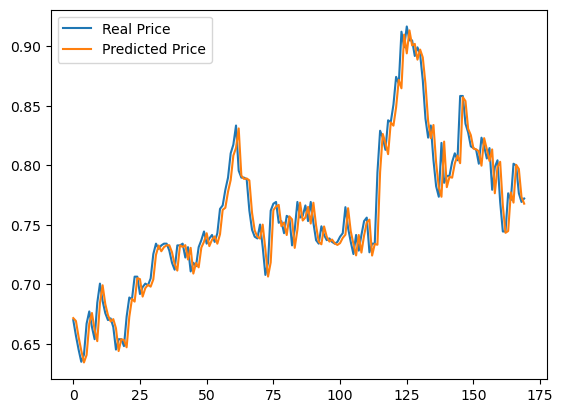

In [17]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Real Price')
plt.plot(pred, label='Predicted Price')
plt.legend()
plt.show()